# Education and Happiness 

Student names: Stan Pieter van Kuik, Rafael Beekman

Team number: C9

In [15]:
# Load image from link
url = 'https://cdn.cbs.nl/images/6d6937674277573235627978534b49652b6e323757513d3d/900x450.jpg'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "Deze wordt nog vervangen"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© Hollandse Hoogte / Peter Hilz


## Introduction

The relationship between happiness and education is a topic of increasing interest within the social sciences. Researchers and policymakers are trying to understand the extent to which education contributes to individual well-being and how happiness, in turn, affects the learning process. 

## Dataset and Preprocessing

First dataset- World Happiness Report 2021:
this dataset can be found at the following web-address:
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021 

variables: \
Country name, name of the country \
Regional indicator, region the country belongs to \
ladder score, happiness score on a scale from 0 to 10 \
standard error of ladderscore, the standard error \
upperwhisker, the upper whisker \
lowerwhisker, the lower whisker \
logged GDP per capita, logaritm of the GDP per capita \
generosity, perceived generosity \
perception of corruption, the perceived corruption on a scale from 0 to 1 \
ladder score in dystopia, Compared to dystopia \
explained by: log GDP per capita, Compared to dystopia \
explained by: Social support, Compared to dystopia \
explained by: Healthy life expectancy, Compared to dystopia \
explained by: Freedom to make life choices, Compared to dystopia \
explained by: Generosity, Compared to dystopia \
explained by: Perceptions of corruption, Compared to dystopia\
Dystopia + residual, \


Second dataset- World Educational Data
this dataset can be found at the following web-address:
https://www.kaggle.com/datasets/nelgiriyewithana/world-educational-data/data 

variables:

Countries and areas, name of the country or area \
OOSR_Pre0Primary_Age_Male, out-of-school rate for pre-primary age males \
OOSR_Pre0Primary_Age_Female, out-of-school rate for pre-primary age females \
OOSR_Primary_Age_Male, out-of-school rate for primary age males \
OOSR_Primary_Age_Female, out-of-school rate for primary age females \
OOSR_Lower_Secondary_Age_Male, out-of-school rate for lower secondary age males \
OOSR_Lower_Secondary_Age_Female, out-of-school rate for lower secondary age females \
OOSR_Upper_Secondary_Age_Male, out-of-school rate for upper secondary age males \
OOSR_Upper_Secondary_Age_Female, out-of-school rate for upper secondary age females \
Completion_Rate_Primary_Male, completion rate for primary education males \
Completion_Rate_Primary_Female, completion rate for primary education females \
Completion_Rate_Lower_Secondary_Male, completion rate for lower secondary education males \
Completion_Rate_Lower_Secondary_Female, completion rate for lower secondary education females \
Completion_Rate_Upper_Secondary_Male, completion rate for upper secondary education males \
Completion_Rate_Upper_Secondary_Female, completion rate for upper secondary education females \
Primary_End_Proficiency_Reading, proficiency in reading at the end of primary education \
Primary_End_Proficiency_Math, proficiency in math at the end of primary education \
Gross_Primary_Education_Enrollment, gross enrollment rate for primary education \

Dataset en preprocessing \
korte uitleg per dataset \
tabel maken van de variabelen per dataset \
welke variabele we gekozen hebben per dataset en hoe we ze gemerged hebben \
Bij world happiness hebben we gekozen voor de ladder score (happiness score) als algemene maatstaf die uit het world happiness report 2021 is gekomen\
verder hebben we gekozen voor log gdp per capita, social support, healthy life expectancy en freedom to make life choices als andere variabelen die los staan van de ladder score maar wel invloed hebben op het educatieniveau\
Bij world education hebben we gekozen om te focussen op secondary education (middelbare school/highschool).\
Hierbij kijken we naar de OOSR ofwel de drop out rate en completion rate van zowel mannen als vrouwen, reading proficiency and math proficiency.\
Hoe we dataset gemerged en gefilterd hebben. \
merge had stan pieter gedaan maar was volgens mij met country als ID en dan alleen de landen die bij beide databases horen.\
filter had ik gedaan maar daarvoor heb ik alleen lower en upper secondary voor male en female de drop out en completion samengevoegd en het gemiddelde genomen zodat we gwn een secondary hebben ipv lower en upper en dan de kolommen gefilterd op wat we nodig hadden en daar een CSV van gemaakt.


## Relationship Education and Happiness

A commonly used argument for the link between happiness and education is that a higher level of education often leads to better economic opportunities and greater job satisfaction. Education provides individuals with the knowledge and skills needed to obtain better jobs, resulting in higher income and greater financial stability. This can, in turn, contribute to an increased sense of well-being and satisfaction. Moreover, education often offers more than just economic benefits; it also promotes personal development and social skills, which can lead to stronger social networks and a sense of purpose and connectedness, all factors that contribute to happiness.

### Completion rate and proficiency

The first thing to look at if we want to know the relationship between happiness and education is the completion rate of school and the average proficiency in both math and reading. It is assumed that being well versed in these subjects allows one to have the opportunity to pursue the job they desire and enjoy, which in turn would make one happier overall. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

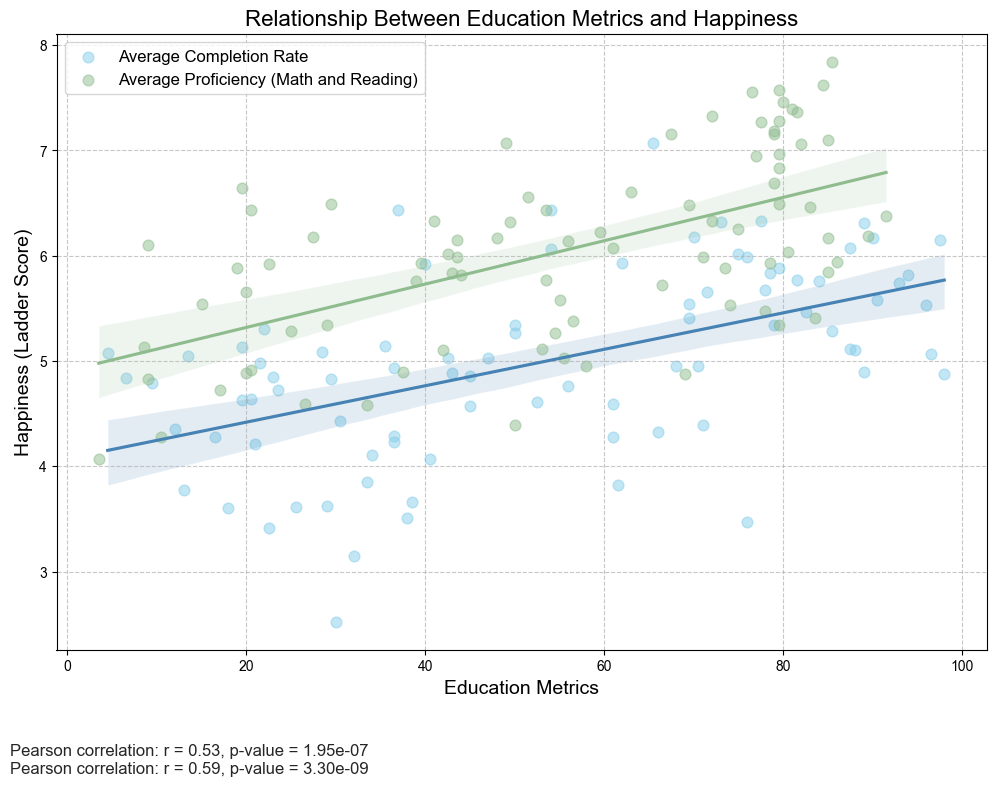

In [3]:
# Load the dfset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)
# Calculate the Average Completion Rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Filter out entries with 0 values in the Average Completion Rate
filtered_data = df[df['Average_Completion_Rate'] != 0]

# Calculate the Average Proficiency (Math and Reading)
df['Average_Proficiency'] = df[['Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math']].mean(axis=1)

# Filter out entries with 0 values in the Average Proficiency
filtered_proficiency_data = df[df['Average_Proficiency'] != 0]

# Calculate Pearson correlation coefficients and p-values
r_completion, p_value_completion = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Ladder score'])
r_proficiency, p_value_proficiency = pearsonr(filtered_proficiency_data['Average_Proficiency'], filtered_proficiency_data['Ladder score'])

# Create a combined scatter plot with regression lines for both variables with improved aesthetics
plt.figure(figsize=(12, 8))

# Plot Average Completion Rate and Happiness
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Ladder score', 
            scatter_kws={'alpha': 0.5, 's': 60}, line_kws={'color': 'steelblue'}, 
            label='Average Completion Rate', color='skyblue')

# Plot Average Proficiency and Happiness
sns.regplot(data=filtered_proficiency_data, x='Average_Proficiency', y='Ladder score', 
            scatter_kws={'alpha': 0.5, 's': 60}, line_kws={'color': 'darkseagreen'}, 
            label='Average Proficiency (Math and Reading)', color='darkseagreen')

# Add titles and labels with improved aesthetics
plt.title('Relationship Between Education Metrics and Happiness', fontsize=16)
plt.xlabel('Education Metrics', fontsize=14)
plt.ylabel('Happiness (Ladder Score)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the style of the plot to improve aesthetics
sns.set_style("whitegrid")

# Display correlation coefficients and p-values in the plot, aligned left and below the x-axis title
plt.gca().text(-0.05, -0.2, 
            f'Pearson correlation: r = {r_completion:.2f}, p-value = {p_value_completion:.2e}\n'
            f'Pearson correlation: r = {r_proficiency:.2f}, p-value = {p_value_proficiency:.2e}',
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes, ha='left')

plt.show()

> *Figure 1: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*   Hier moet nog een kleine beschrijving bij

This scatter plot illustrates the relationship between education metrics and happiness, measured as a ladder score. Two sets of education metrics are plotted: the average completion rate (blue) and average proficiency in math and reading (green). Both variables show a positive correlation with happiness.

The trend lines for both metrics slope upwards, indicating that higher education metrics are associated with higher happiness scores. The average proficiency in math and reading has a steeper slope compared to the completion rate, suggesting it might have a stronger correlation with happiness. Each data point represents a country's corresponding values for education metrics and happiness.

The shading around the trend lines represents the confidence intervals, showing a reasonable level of uncertainty but a clear overall trend. This visualization underscores the importance of educational attainment and proficiency in contributing to overall happiness. The results suggest that improving education quality and completion rates could potentially enhance well-being and happiness across populations.

However this only describes scores and the quality of the education but doesn’t entail whether these scores actually led to them completing their education or dropping out. 


### The Second Argument of Your First Perspective

It va esser tam simplic quam Occidental in fact, it va esser Occidental. A un Angleso it va semblar un simplificat Angles, quam un skeptic Cambridge amico dit me que Occidental es. Li Europan lingues es membres del sam familie. Lor separat existentie es un myth. Por scientie, musica, sport etc, litot Europa usa li sam vocabular. Li lingues differe solmen in li grammatica, li pronunciation e li plu commun vocabules. Omnicos directe al desirabilite de un nov lingua franca: On refusa continuar payar custosi traductores. At solmen va esser necessi far uniform grammatica, pronunciation e plu sommun paroles.

C:\Users\stanp\AppData\Local\Temp\ipykernel_9788\3729267338.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\stanp\AppData\Local\Temp\ipykernel_9788\3729267338.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



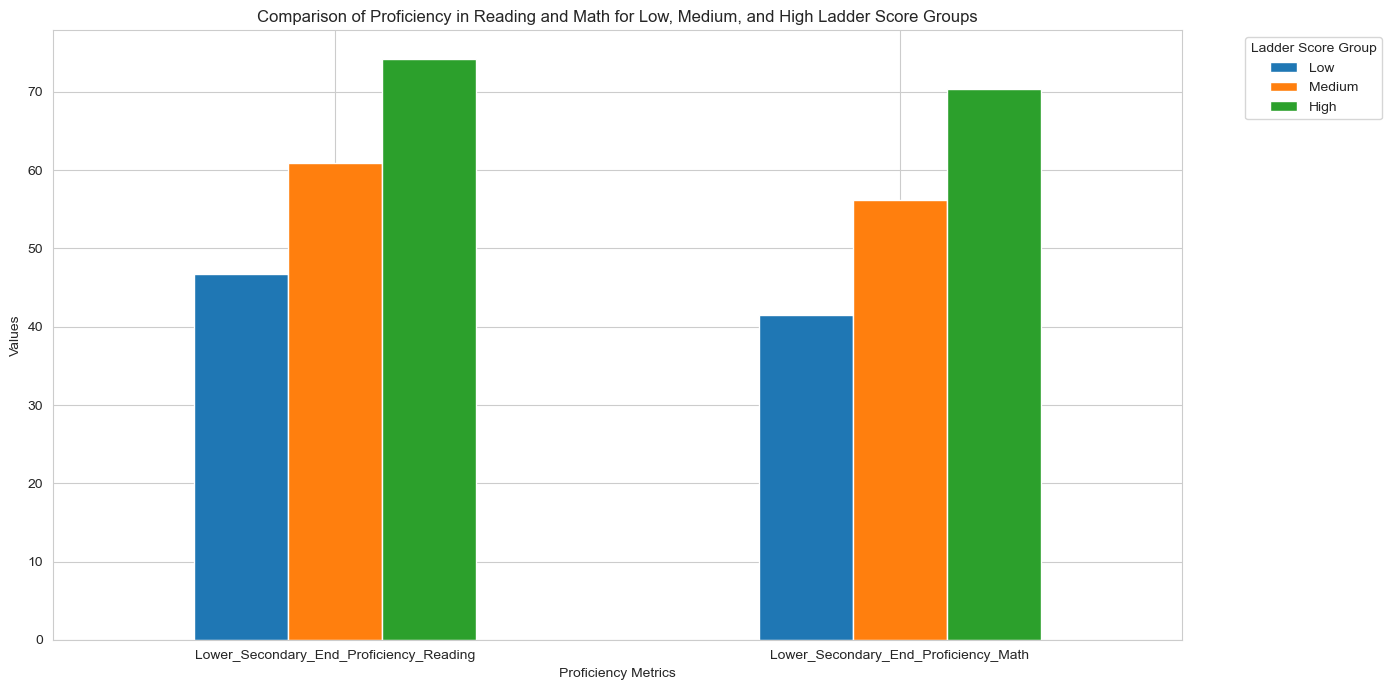

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)

# Filter out countries with any zero values in the relevant columns
filtered_data = df[(df['Lower_Secondary_End_Proficiency_Reading'] != 0) & 
                   (df['Lower_Secondary_End_Proficiency_Math'] != 0)]

# Split the countries into three groups based on Ladder score using qcut
filtered_data.loc[:, 'Ladder_Group'] = pd.qcut(filtered_data['Ladder score'], 3, labels=['Low', 'Medium', 'High'])

# Select only the proficiency columns for grouping
proficiency_cols = ['Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math']
grouped_data = filtered_data.groupby('Ladder_Group')[proficiency_cols].mean()

# Prepare the data for plotting
bar_data = grouped_data.T

# Plot the data
bar_data.plot(kind='bar', figsize=(14, 7))
plt.title('Comparison of Proficiency in Reading and Math for Low, Medium, and High Ladder Score Groups')
plt.xlabel('Proficiency Metrics')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(title='Ladder Score Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


> *Figure 3: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

This bar chart compares the proficiency in reading and math for lower secondary education among three groups categorized by their ladder scores: low, medium, and high. The proficiency metrics for reading and math are shown on the x-axis, while the y-axis represents the values of proficiency.

From the chart, it is evident that both reading and math proficiency increase as the ladder score group improves. The low ladder score group (blue) consistently shows lower proficiency in both reading and math compared to the medium (orange) and high (green) ladder score groups. Specifically, the high ladder score group exhibits the highest proficiency in both subjects, with math proficiency reaching its peak.

This visual representation suggests a positive correlation between educational proficiency and ladder scores, indicating that individuals with higher proficiency in reading and math tend to belong to higher ladder score groups. The results imply that enhancing educational outcomes, particularly in reading and math, might be linked to improved well-being and ladder scores, highlighting the significance of quality education in achieving higher happiness levels.

## Relationship Social-economic factors and education

Education has close ties with economic and social factors such as social support and GDP per capita. Firstly, a higher GDP per capita often means more government resources for education, resulting in better facilities, learning materials, and qualified teachers. Secondly, social support, such as scholarships and grants, reduces financial barriers, allowing more individuals to access education. Additionally, social support mechanisms foster an environment where students feel supported and motivated, enhancing their academic performance. All of this leads to a better-educated workforce, which in turn contributes to economic growth and social cohesion. In short, a strong synergy between education, economic prosperity, and social support creates a positive virtuous cycle of progress and development.

### The First Argument of Your Second Perspective

Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh. Donec sodales sagittis magna. Sed consequat, leo eget bibendum sodales, augue velit cursus nunc.

In [20]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)

# Calculate the Average Completion Rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Calculate the Average OOSR
df['Average_OOSR'] = df[['Average_OOSR_Male', 'Average_OOSR_Female']].mean(axis=1)

# Filter out entries with 0 values in both Completion Rate and OOSR
filtered_proficiency_data = df[(df['Average_Completion_Rate'] != 0) & 
                               (df['Average_OOSR'] != 0)]

# Normalize the 'Freedom to make life choices' for better size differentiation
filtered_proficiency_data['Normalized_Freedom'] = (filtered_proficiency_data['Freedom to make life choices'] - filtered_proficiency_data['Freedom to make life choices'].min()) / \
                                                  (filtered_proficiency_data['Freedom to make life choices'].max() - filtered_proficiency_data['Freedom to make life choices'].min())

# Create a bubble chart with normalized Freedom to make life choices for bubble sizes
fig = px.scatter(filtered_proficiency_data, 
                 x='Average_Completion_Rate', 
                 y='Average_OOSR', 
                 size='Normalized_Freedom', 
                 color='Social support', 
                 hover_name='Country',
                 title='Bubble Chart: Completion Rate and OOSR with Social Support as Bubble Size',
                 labels={
                     'Average_Completion_Rate': 'Average Completion Rate',
                     'Average_OOSR': 'Average OOSR',
                     'Social support': 'Social Support',
                     'Ladder score': 'Happiness (Ladder Score)'
                 },
                 size_max=20,  # Adjust the size_max for desired effect
                 color_continuous_scale='RdYlGn')  # Color scale from red to green

fig.update_layout(title_font_size=16, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()


C:\Users\stanp\AppData\Local\Temp\ipykernel_9788\1997824625.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



> *Figure 4: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

The bubble chart visualizes the relationship between the average completion rate of education and the average out-of-school rate (OOSR) across various countries. Each bubble represents a country, with the bubble size normalized based on the "Freedom to make life choices" indicator and colored by the "Social support" indicator. 

From the chart you can observe that countries with higher average completion rates tend to have lower OOSR, indicating a positive correlation between education completion and student retention. Larger bubbles denote countries with higher levels of perceived freedom to make life choices. These countries often show better educational outcomes, suggesting that individual freedom could positively impact educational participation and completion. The color scale from red to green represents the level of social support, with greener hues indicating higher support. Countries with high social support generally exhibit better educational metrics, underscoring the importance of a supportive social environment for educational success.

The inverse relationship between completion rates and OOSR is expected, as higher completion rates naturally imply fewer students dropping out. This reflects the effectiveness of educational systems in retaining students until the end of their secondary education. The size of the bubbles, which indicates the normalized level of freedom to make life choices, highlights the potential impact of personal autonomy on educational outcomes. Greater freedom allows individuals to pursue education according to their preferences and circumstances, likely leading to higher completion rates.The color coding emphasizes the critical role of social support in educational success. Countries with robust social support systems provide necessary resources and a conducive environment for students to complete their education, reducing dropout rates and improving overall educational attainment.

### The Second Argument of Your Second Perspective

Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt.

Pearson correlation between Average Completion Rate and Logged GDP per capita: r = 0.67, p-value = 3.05e-06
Pearson correlation between Average Proficiency and Logged GDP per capita: r = 0.44, p-value = 5.65e-03
Pearson correlation between Average Completion Rate and Healthy life expectancy: r = 0.47, p-value = 2.71e-03
Pearson correlation between Average Proficiency and Healthy life expectancy: r = 0.59, p-value = 8.02e-05


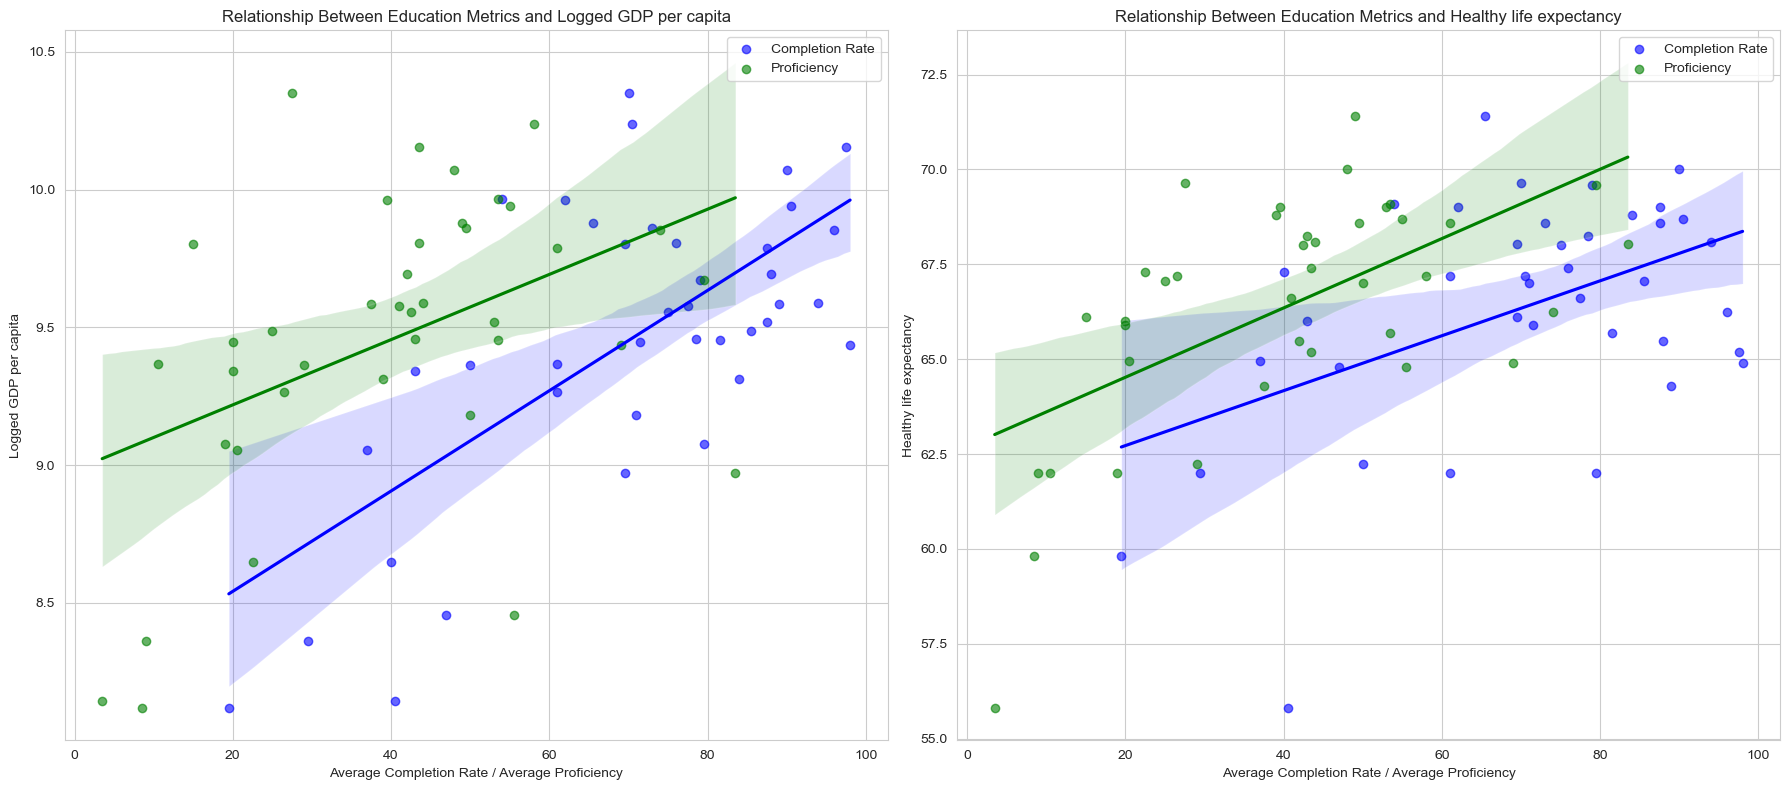

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)

# Calculate the average completion rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Calculate the average proficiency
df['Average_Proficiency'] = df[['Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math']].mean(axis=1)

# Filter out rows where 'Logged GDP per capita', 'Average_Completion_Rate', 'Average_Proficiency', and 'Healthy life expectancy' are 0
filtered_data = df[(df['Logged GDP per capita'] != 0) & 
                   (df['Average_Completion_Rate'] != 0) & 
                   (df['Average_Proficiency'] != 0) & 
                   (df['Healthy life expectancy'] != 0)]

# Create a combined plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot the relationship between Average Completion Rate and Logged GDP per capita
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Logged GDP per capita', 
            scatter_kws={'alpha': 0.6}, label='Completion Rate', color='b', ax=ax1)
# Plot the relationship between Average Proficiency and Logged GDP per capita
sns.regplot(data=filtered_data, x='Average_Proficiency', y='Logged GDP per capita', 
            scatter_kws={'alpha': 0.6}, label='Proficiency', color='g', ax=ax1)

# Calculate Pearson correlation coefficients and p-values for Logged GDP per capita
r_completion_gdp, p_value_completion_gdp = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Logged GDP per capita'])
r_proficiency_gdp, p_value_proficiency_gdp = pearsonr(filtered_data['Average_Proficiency'], filtered_data['Logged GDP per capita'])

# Print correlation results for the first plot
print(f'Pearson correlation between Average Completion Rate and Logged GDP per capita: r = {r_completion_gdp:.2f}, p-value = {p_value_completion_gdp:.2e}')
print(f'Pearson correlation between Average Proficiency and Logged GDP per capita: r = {r_proficiency_gdp:.2f}, p-value = {p_value_proficiency_gdp:.2e}')

# Add titles and labels for the first plot
ax1.set_title('Relationship Between Education Metrics and Logged GDP per capita')
ax1.set_xlabel('Average Completion Rate / Average Proficiency')
ax1.set_ylabel('Logged GDP per capita')
ax1.legend()

# Create the second plot: Relationship between Education Metrics and Healthy life expectancy
# Plot the relationship between Average Completion Rate and Healthy life expectancy
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Healthy life expectancy', 
            scatter_kws={'alpha': 0.6}, label='Completion Rate', color='b', ax=ax2)
# Plot the relationship between Average Proficiency and Healthy life expectancy
sns.regplot(data=filtered_data, x='Average_Proficiency', y='Healthy life expectancy', 
            scatter_kws={'alpha': 0.6}, label='Proficiency', color='g', ax=ax2)

# Calculate Pearson correlation coefficients and p-values for Healthy life expectancy
r_completion_life, p_value_completion_life = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Healthy life expectancy'])
r_proficiency_life, p_value_proficiency_life = pearsonr(filtered_data['Average_Proficiency'], filtered_data['Healthy life expectancy'])

# Print correlation results for the second plot
print(f'Pearson correlation between Average Completion Rate and Healthy life expectancy: r = {r_completion_life:.2f}, p-value = {p_value_completion_life:.2e}')
print(f'Pearson correlation between Average Proficiency and Healthy life expectancy: r = {r_proficiency_life:.2f}, p-value = {p_value_proficiency_life:.2e}')

# Add titles and labels for the second plot
ax2.set_title('Relationship Between Education Metrics and Healthy life expectancy')
ax2.set_xlabel('Average Completion Rate / Average Proficiency')
ax2.set_ylabel('Healthy life expectancy')
ax2.legend()

# Show plots
plt.tight_layout()
plt.grid(True)
plt.show()


> *Figure 5: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

In [22]:
import pandas as pd
import plotly.graph_objects as go



# Calculate additional columns needed
df['Average_Completion_Rate'] = (df['Average_Completion_Rate_Male'] + df['Average_Completion_Rate_Female']) / 2
df['Average_OOSR'] = (df['Average_OOSR_Male'] + df['Average_OOSR_Female']) / 2

# Create a combined world map plot with a dropdown menu for different variables
fig = go.Figure()

# Add traces for each variable
# Ladder score plot
fig.add_trace(go.Choropleth(
    locations=df['Country'],
    locationmode='country names',
    z=df['Ladder score'],
    colorscale='RdYlGn',
    colorbar_title='Ladder score',
    visible=True
))

# Average Completion Rate plot
fig.add_trace(go.Choropleth(
    locations=df[df['Average_Completion_Rate'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Average_Completion_Rate'] > 0]['Average_Completion_Rate'],
    colorscale='RdYlGn',
    colorbar_title='Average Completion Rate',
    visible=False
))

# Average OOSR plot
fig.add_trace(go.Choropleth(
    locations=df[df['Average_OOSR'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Average_OOSR'] > 0]['Average_OOSR'],
    colorscale='RdYlGn_r',
    colorbar_title='Average OOSR',
    visible=False
))

# Lower Secondary End Proficiency in Reading plot
fig.add_trace(go.Choropleth(
    locations=df[df['Lower_Secondary_End_Proficiency_Reading'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Lower_Secondary_End_Proficiency_Reading'] > 0]['Lower_Secondary_End_Proficiency_Reading'],
    colorscale='RdYlGn',
    colorbar_title='Proficiency in Reading',
    visible=False
))

# Lower Secondary End Proficiency in Math plot
fig.add_trace(go.Choropleth(
    locations=df[df['Lower_Secondary_End_Proficiency_Math'] > 0]['Country'],
    locationmode='country names',
    z=df[df['Lower_Secondary_End_Proficiency_Math'] > 0]['Lower_Secondary_End_Proficiency_Math'],
    colorscale='RdYlGn',
    colorbar_title='Proficiency in Math',
    visible=False
))

# Create dropdown
dropdown_buttons = [
    {'label': 'Ladder score', 'method': 'update', 'args': [{'visible': [True, False, False, False, False]}, {'title': 'World Happiness Ladder Score by Country'}]},
    {'label': 'Average Completion Rate', 'method': 'update', 'args': [{'visible': [False, True, False, False, False]}, {'title': 'Average Completion Rate by Country'}]},
    {'label': 'Average OOSR', 'method': 'update', 'args': [{'visible': [False, False, True, False, False]}, {'title': 'Average Out of School Rate (OOSR) by Country'}]},
    {'label': 'Proficiency in Reading', 'method': 'update', 'args': [{'visible': [False, False, False, True, False]}, {'title': 'Lower Secondary End Proficiency in Reading by Country'}]},
    {'label': 'Proficiency in Math', 'method': 'update', 'args': [{'visible': [False, False, False, False, True]}, {'title': 'Lower Secondary End Proficiency in Math by Country'}]},
]

# Update layout with dropdown
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
    }],
    title_text='World Maps with Dropdown'
)

# Display the interactive plot
fig.show()



> *Figure 6: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

Deze visualization nog niet af!

Dropdown(description='Country:', options=('Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Austra…

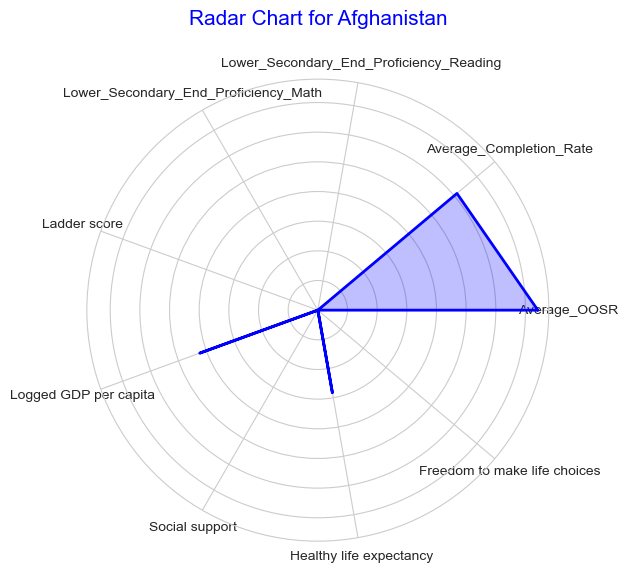

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
import ipywidgets as widgets

# Load the dataset
file_path = 'filtered_global_education_world_happiness_average.csv'
data = pd.read_csv(file_path)

# Calculate average values for OOSR and Completion Rate
data['Average_OOSR'] = data[['Average_OOSR_Male', 'Average_OOSR_Female']].mean(axis=1)
data['Average_Completion_Rate'] = data[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Select relevant columns for the radar chart
radar_data = data[['Country', 'Average_OOSR', 'Average_Completion_Rate',
                   'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math',
                   'Ladder score', 'Logged GDP per capita', 'Social support',
                   'Healthy life expectancy', 'Freedom to make life choices']]

# Normalize the data for radar chart
scaler = MinMaxScaler()
radar_data_normalized = radar_data.copy()
radar_data_normalized.iloc[:, 1:] = scaler.fit_transform(radar_data.iloc[:, 1:])

# Function to create radar chart
def create_radar_chart(country):
    labels = radar_data_normalized.columns[1:]
    num_vars = len(labels)
    
    # Create a 360 degree circle
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # The radar chart is circular, so we need to "complete the loop" and append the start to the end.
    angles += angles[:1]
    
    # Select the data for the chosen country
    values = radar_data_normalized[radar_data_normalized['Country'] == country].iloc[0, 1:].tolist()
    values += values[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    ax.set_title(f'Radar Chart for {country}', size=15, color='blue', y=1.1)
    
    plt.show()

# Dropdown menu to select country
countries = radar_data_normalized['Country'].unique()

country_dropdown = widgets.Dropdown(
    options=countries,
    description='Country:',
    disabled=False,
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        create_radar_chart(change['new'])

country_dropdown.observe(on_change)

display(country_dropdown)

# Generate the initial radar chart
create_radar_chart(countries[0])


## Reflection

Curabitur non lacus ex. Maecenas at massa ultricies justo venenatis condimentum sed et eros. Ut vitae iaculis massa. Aenean vitae sagittis nibh. Aliquam pharetra dui suscipit purus dictum rutrum. Donec ultricies odio quis porttitor aliquet. Fusce sed nisl non velit rutrum commodo nec sed magna. Morbi non volutpat mi, cursus pulvinar dolor.

Nam sit amet volutpat sapien. Aenean eu mattis neque. Maecenas eget libero consequat, condimentum nulla luctus, fermentum lectus. Donec at enim sit amet dolor vestibulum faucibus. Vestibulum velit elit, faucibus ut mi sit amet, mollis rutrum eros. Ut ut lacinia ante, eu placerat ligula. Fusce quis convallis purus. Maecenas eget fringilla quam.

Proin ac sapien et lectus tempor dignissim a at arcu. Donec placerat aliquet odio, vel aliquam nibh tempus vel. Pellentesque non velit iaculis, porta metus sed, dictum augue. Aenean tempus gravida ullamcorper. Proin cursus fringilla turpis. Integer id lectus dignissim, ultrices metus vel, dictum quam. Suspendisse augue ligula, vestibulum ac nulla a, porta pharetra leo. Integer et pharetra lacus, in porttitor mauris. Cras sodales metus sit amet enim rhoncus sodales. Etiam orci enim, tincidunt eget arcu vel, gravida scelerisque lacus.

## Work Distribution

Curabitur non lacus ex. Maecenas at massa ultricies justo venenatis condimentum sed et eros. Ut vitae iaculis massa. Aenean vitae sagittis nibh. Aliquam pharetra dui suscipit purus dictum rutrum. Donec ultricies odio quis porttitor aliquet. Fusce sed nisl non velit rutrum commodo nec sed magna. Morbi non volutpat mi, cursus pulvinar dolor.

Nam sit amet volutpat sapien. Aenean eu mattis neque. Maecenas eget libero consequat, condimentum nulla luctus, fermentum lectus. Donec at enim sit amet dolor vestibulum faucibus. Vestibulum velit elit, faucibus ut mi sit amet, mollis rutrum eros. Ut ut lacinia ante, eu placerat ligula. Fusce quis convallis purus. Maecenas eget fringilla quam.

Proin ac sapien et lectus tempor dignissim a at arcu. Donec placerat aliquet odio, vel aliquam nibh tempus vel. Pellentesque non velit iaculis, porta metus sed, dictum augue. Aenean tempus gravida ullamcorper. Proin cursus fringilla turpis. Integer id lectus dignissim, ultrices metus vel, dictum quam. Suspendisse augue ligula, vestibulum ac nulla a, porta pharetra leo. Integer et pharetra lacus, in porttitor mauris. Cras sodales metus sit amet enim rhoncus sodales. Etiam orci enim, tincidunt eget arcu vel, gravida scelerisque lacus.

## References

Centraal Bureau voor de Statistiek. (2023). More strikes but fewer strikers in 2022. Statistics Netherlands. https://www.cbs.nl/en-gb/news/2023/18/more-strikes-but-fewer-strikers-in-2022